In [0]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [0]:
#Read the input file
df = pd.read_csv("bank.csv")

In [5]:
#Display the first 10 rows
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
#Print the datatypes
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.shape
#10000 records and 14 columns including ID column. 

(10000, 14)

In [8]:
#Describe the datafram
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [0]:
# Addressing the incorrect data

# dropping RowNumber, CustomerId, Suname  columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [11]:
#Checking the df after removing the columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


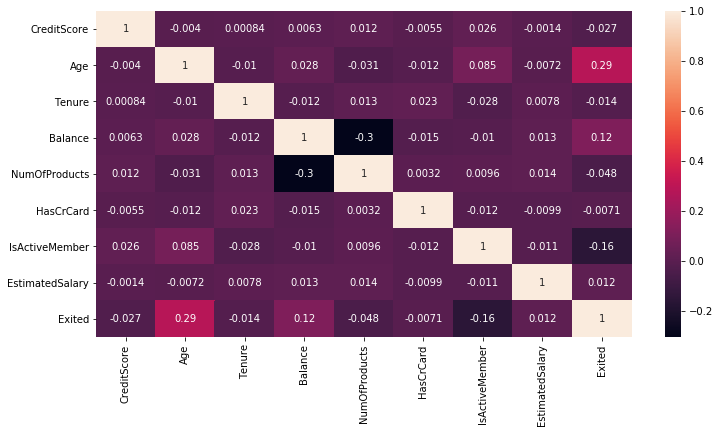

In [12]:
#Plotting the heatmap to understand the correlation amoung variables
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

#Looks like the Age has the strong correlation in saying if the customer is leaving the bank or not

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 3240x720 with 0 Axes>

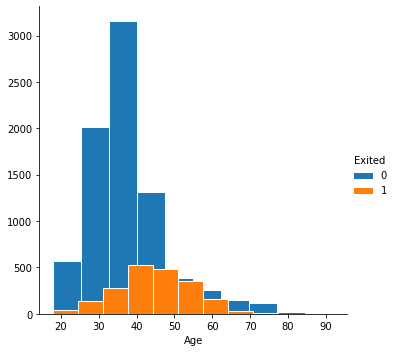

In [13]:
# As Age has the strong correlation, lets see that in detail

plt.figure(figsize=(45,10))
g = sns.FacetGrid(df, size =5, hue = 'Exited')
(g.map(plt.hist,'Age',edgecolor="w").add_legend())

# from the diagram below, it is clear that more number of customers are leaving from the range 30-50. 

# Data Preprocessing   & 

In [0]:
X = df[df.columns[0:-1]]
Y = df["Exited"]

In [15]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [17]:
# Addressing the columns Geography and gender as they are data types Object
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
X.head()

# Gender: Female: 0; Male: 1
# Geography: France:0, Spain:2,  Germany :1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [0]:
# Using oneHotEncoding to change the dataframe before we split the Test, Train data

#onehotencoding = OneHotEncoder(categorical_features = [1])
#X = onehotencoding.fit_transform(X).toarray()

In [21]:
print (X)

      CreditScore  Geography  ...  IsActiveMember  EstimatedSalary
0             619          0  ...               1        101348.88
1             608          2  ...               1        112542.58
2             502          0  ...               0        113931.57
3             699          0  ...               0         93826.63
4             850          2  ...               1         79084.10
...           ...        ...  ...             ...              ...
9995          771          0  ...               0         96270.64
9996          516          0  ...               1        101699.77
9997          709          0  ...               1         42085.58
9998          772          1  ...               0         92888.52
9999          792          0  ...               0         38190.78

[10000 rows x 10 columns]


# Spliting the Data to Train and Test

In [0]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.25,random_state=42)

# Normalize the train and test data

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_train_X = pd.DataFrame(scaler.fit_transform(train_X))

normalized_test_X = pd.DataFrame(scaler.transform(test_X))


In [24]:
print(train_X)

      CreditScore  Geography  ...  IsActiveMember  EstimatedSalary
4901          673          0  ...               1         21063.71
4375          850          1  ...               0         31825.84
6698          725          0  ...               0         61326.43
9805          644          0  ...               1         43943.09
1101          703          2  ...               0         50679.48
...           ...        ...  ...             ...              ...
5734          768          0  ...               1         69381.05
5191          682          0  ...               1           706.50
5390          735          0  ...               0         92220.12
860           667          0  ...               0         97508.04
7270          697          1  ...               1         53581.14

[7500 rows x 10 columns]


In [25]:
print(normalized_train_X)

             0         1         2  ...         7         8         9
0     0.218351 -0.904943  0.911867  ... -1.539736  0.969789 -1.382844
1     2.057280  0.301219  0.911867  ...  0.649462 -1.031152 -1.195890
2     0.758602 -0.904943 -1.096651  ... -1.539736 -1.031152 -0.683422
3    -0.082942 -0.904943  0.911867  ... -1.539736  0.969789 -0.985396
4     0.530034  1.507381  0.911867  ...  0.649462 -1.031152 -0.868375
...        ...       ...       ...  ...       ...       ...       ...
7495  1.205347 -0.904943  0.911867  ...  0.649462  0.969789 -0.543502
7496  0.311856 -0.904943 -1.096651  ...  0.649462  0.969789 -1.736478
7497  0.862496 -0.904943 -1.096651  ... -1.539736 -1.031152 -0.146754
7498  0.156015 -0.904943  0.911867  ...  0.649462 -1.031152 -0.054895
7499  0.467698  0.301219  0.911867  ...  0.649462  0.969789 -0.817969

[7500 rows x 10 columns]


In [26]:
print(normalized_test_X)

             0         1         2  ...         7         8         9
0    -0.581635  0.301219  0.911867  ... -1.539736 -1.031152 -1.022827
1    -0.301120 -0.904943  0.911867  ...  0.649462  0.969789  0.794069
2    -0.529688  1.507381 -1.096651  ...  0.649462 -1.031152 -0.731457
3    -1.516684  0.301219  0.911867  ...  0.649462  0.969789  1.216203
4    -0.955654  1.507381 -1.096651  ...  0.649462  0.969789  0.243229
...        ...       ...       ...  ...       ...       ...       ...
2495 -0.072553  1.507381 -1.096651  ... -1.539736  0.969789 -1.451778
2496 -0.862150  1.507381 -1.096651  ...  0.649462 -1.031152 -0.444417
2497  1.205347 -0.904943  0.911867  ...  0.649462  0.969789 -1.604287
2498  0.394972 -0.904943 -1.096651  ... -1.539736 -1.031152 -0.336586
2499 -0.498519  0.301219 -1.096651  ...  0.649462  0.969789 -0.733793

[2500 rows x 10 columns]


# Deep Neural Network

In [27]:
import tensorflow as tf
# Initialize the constructor

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define the model architecture

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='sigmoid', input_shape=(10,)))

# Add one hidden layer 
model.add(Dense(8, activation='sigmoid'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [28]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [29]:
#Printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Executing the model with model.fit()
history = model.fit(normalized_train_X, train_Y,epochs=25, batch_size=1, verbose=1)

Train on 7500 samples
Epoch 1/25
7500/7500 [==============================] - 19s 3ms/sample - loss: 0.4583 - acc: 0.7983
Epoch 2/25
7500/7500 [==============================] - 18s 2ms/sample - loss: 0.4286 - acc: 0.8169
Epoch 3/25
7500/7500 [==============================] - 18s 2ms/sample - loss: 0.4198 - acc: 0.8285
Epoch 4/25
7500/7500 [==============================] - 18s 2ms/sample - loss: 0.4144 - acc: 0.8307
Epoch 5/25
7500/7500 [==============================] - 18s 2ms/sample - loss: 0.4064 - acc: 0.8336
Epoch 6/25
7500/7500 [==============================] - 17s 2ms/sample - loss: 0.3974 - acc: 0.8365
Epoch 7/25
7500/7500 [==============================] - 18s 2ms/sample - loss: 0.3883 - acc: 0.8437
Epoch 8/25
7500/7500 [==============================] - 17s 2ms/sample - loss: 0.3806 - acc: 0.8440
Epoch 9/25
7500/7500 [==============================] - 17s 2ms/sample - loss: 0.3737 - acc: 0.8465
Epoch 10/25
7500/7500 [==============================] - 17s 2ms/sample - loss

In [31]:
#Customize the learning rate to 0.5 in sgd optimizer

model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.5),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Executing the model with model.fit()
history = model.fit(normalized_train_X, train_Y,epochs=25, batch_size=1, verbose=1)

Train on 7500 samples
Epoch 1/25
7500/7500 [==============================] - 17s 2ms/sample - loss: 0.4089 - acc: 0.8341
Epoch 2/25
7500/7500 [==============================] - 17s 2ms/sample - loss: 0.3845 - acc: 0.8464
Epoch 3/25
7500/7500 [==============================] - 17s 2ms/sample - loss: 0.3801 - acc: 0.8452
Epoch 4/25
7500/7500 [==============================] - 17s 2ms/sample - loss: 0.3787 - acc: 0.8443
Epoch 5/25
7500/7500 [==============================] - 17s 2ms/sample - loss: 0.3731 - acc: 0.8484
Epoch 6/25
7500/7500 [==============================] - 17s 2ms/sample - loss: 0.3746 - acc: 0.8480
Epoch 7/25
7500/7500 [==============================] - 17s 2ms/sample - loss: 0.3689 - acc: 0.8515
Epoch 8/25
7500/7500 [==============================] - 17s 2ms/sample - loss: 0.3677 - acc: 0.8487
Epoch 9/25
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.3672 - acc: 0.8487
Epoch 10/25
7500/7500 [==============================] - 16s 2ms/sample - loss

In [0]:
y_pred = np.round(model.predict(normalized_test_X))

In [34]:
y_pred[0:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [35]:
#Print the test Accuracy
loss, acc = model.evaluate(normalized_test_X, test_Y, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.856


In [36]:
#Confusion Matrix
from sklearn import metrics

print(pd.DataFrame(metrics.confusion_matrix(test_Y, y_pred, labels=[0 ,1]), index=['true:White', 'true:Red'], columns=['pred:White', 'pred:Red']))

            pred:White  pred:Red
true:White        1925        78
true:Red           283       214
